# Gather

In [873]:
import numpy as np
import pandas as pd
import requests
import os
import tweepy
import time
import json
import matplotlib.pyplot as plt
%matplotlib inline

First data to use

In [874]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

Second data to use

In [875]:
# Make directory if it doesn't already exist
folder_name = 'image_prediction'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [876]:
with open (os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
        file.write(response.content)

In [877]:
image_prediction = pd.read_csv('image_prediction/image-predictions.tsv', sep = '\t')

Third data to use

In [878]:
consumer_key = 'XXXXXXXX'
consumer_secret = 'XXXXXXXX'
access_token = 'XXXXXXXX'
access_secret = 'XXXXXXXX'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)


In [879]:
#This part is for gathering data through Twitter API
"""
start = time.time()
json_data = {}  
json_data['tweet_json'] = []

for i in range(len(twitter_archive['tweet_id'])):
    try:
        tweet_id = twitter_archive['tweet_id'][i]
        favorite_count = api.get_status(tweet_id, tweet_mode='extended')._json['favorite_count']
        retweet_count = api.get_status(tweet_id, tweet_mode='extended')._json['retweet_count']
        json_data['tweet_json'].append({'tweet_id': int(tweet_id),
                            'favorite_count': int(favorite_count),
                            'retweet_count': int(retweet_count)})
        
    except Exception as e:
        print('No status found with that ID: ', tweet_id)
        
with open('tweet_json.txt', 'w') as outfile:  
    json.dump(json_data, outfile)
    
end = time.time()
print(end - start)
"""

"\nstart = time.time()\njson_data = {}  \njson_data['tweet_json'] = []\n\nfor i in range(len(twitter_archive['tweet_id'])):\n    try:\n        tweet_id = twitter_archive['tweet_id'][i]\n        favorite_count = api.get_status(tweet_id, tweet_mode='extended')._json['favorite_count']\n        retweet_count = api.get_status(tweet_id, tweet_mode='extended')._json['retweet_count']\n        json_data['tweet_json'].append({'tweet_id': int(tweet_id),\n                            'favorite_count': int(favorite_count),\n                            'retweet_count': int(retweet_count)})\n        \n    except Exception as e:\n        print('No status found with that ID: ', tweet_id)\n        \nwith open('tweet_json.txt', 'w') as outfile:  \n    json.dump(json_data, outfile)\n    \nend = time.time()\nprint(end - start)\n"

In [880]:
#read json from txt and load to dataframe
with open('tweet_json.txt') as json_file:  
    data_new = json.load(json_file)

df_tweet_json = pd.DataFrame.from_records(data_new['tweet_json'])

# Assess

<I>twitter_archive table</I>

In [881]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [882]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [883]:
list(twitter_archive)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [884]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [885]:
twitter_archive[twitter_archive.rating_numerator == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [886]:
twitter_archive[twitter_archive.rating_denominator == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [887]:
twitter_archive.tweet_id.value_counts()

749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
700462010979500032    1
780858289093574656    1
699775878809702401    1
880095782870896641    1
760521673607086080    1
776477788987613185    1
691820333922455552    1
715696743237730304    1
714606013974974464    1
760539183865880579    1
813157409116065792    1
676430933382295552    1
743510151680958465    1
837012587749474308    1
833722901757046785    1
818259473185828864    1
670704688707301377    1
667160273090932737    1
674394782723014656    1
672082170312290304    1
670093938074779648    1
759923798737051648    1
809920764300447744    1
805487436403003392    1
838085839343206401    1
                     ..
763956972077010945    1
870308999962521604    1
720775346191278080    1
785927819176054784    1
783347506784731136    1
775733305207554048    1
834209720923721728    1
825026590719483904    1
758405701903519748    1
668986018524233728    1
6909388994772213

In [888]:
twitter_archive[twitter_archive.name.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Canela. She attempted some fancy porch...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,19607400.0,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,None,None,None
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a corgi undercover as a malamute....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/885167619...,13,10,None,None,None,None,None
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I present to you, Pup in Hat. Pup in Hat is gr...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/884441805...,14,10,None,None,None,None,None


In [889]:
twitter_archive.name.value_counts()

None           745
a               55
Charlie         12
Oliver          11
Cooper          11
Lucy            11
Lola            10
Tucker          10
Penny           10
Bo               9
Winston          9
the              8
Sadie            8
an               7
Buddy            7
Bailey           7
Toby             7
Daisy            7
Koda             6
Jack             6
Milo             6
Bella            6
Jax              6
Stanley          6
Oscar            6
Rusty            6
Dave             6
Scout            6
Leo              6
Bentley          5
              ... 
Batdog           1
Eriq             1
Sojourner        1
Darby            1
Pumpkin          1
Bowie            1
Obie             1
Carbon           1
Katie            1
my               1
Sailer           1
Furzey           1
Maxwell          1
Jarod            1
Chaz             1
Peanut           1
Ricky            1
Charleson        1
Richie           1
Cedrick          1
Dotsy            1
Willem      

In [890]:
twitter_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [891]:
twitter_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [892]:
twitter_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [893]:
twitter_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [894]:
twitter_archive.text[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [895]:
twitter_archive.expanded_urls

0       https://twitter.com/dog_rates/status/892420643...
1       https://twitter.com/dog_rates/status/892177421...
2       https://twitter.com/dog_rates/status/891815181...
3       https://twitter.com/dog_rates/status/891689557...
4       https://twitter.com/dog_rates/status/891327558...
5       https://twitter.com/dog_rates/status/891087950...
6       https://gofundme.com/ydvmve-surgery-for-jax,ht...
7       https://twitter.com/dog_rates/status/890729181...
8       https://twitter.com/dog_rates/status/890609185...
9       https://twitter.com/dog_rates/status/890240255...
10      https://twitter.com/dog_rates/status/890006608...
11      https://twitter.com/dog_rates/status/889880896...
12      https://twitter.com/dog_rates/status/889665388...
13      https://twitter.com/dog_rates/status/889638837...
14      https://twitter.com/dog_rates/status/889531135...
15      https://twitter.com/dog_rates/status/889278841...
16      https://twitter.com/dog_rates/status/888917238...
17      https:

In [896]:
twitter_archive.expanded_urls[1]

'https://twitter.com/dog_rates/status/892177421306343426/photo/1'

In [897]:
twitter_archive.expanded_urls[6]

'https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1'

In [898]:
twitter_archive.expanded_urls[27]

'https://www.gofundme.com/mingusneedsus,https://twitter.com/dog_rates/status/886736880519319552/photo/1,https://twitter.com/dog_rates/status/886736880519319552/photo/1'

In [899]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [900]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

<I>image_prediction table</I>

In [901]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [902]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [903]:
list(image_prediction)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [904]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


<I>df_tweet_json table</I>

In [905]:
df_tweet_json

,favorite_count,retweet_count,tweet_id
0,38382,8431,892420643555336193
1,32891,6211,892177421306343426
2,24785,4111,891815181378084864
3,41722,8558,891689557279858688
4,39897,9283,891327558926688256
5,20023,3081,891087950875897856
6,11723,2045,890971913173991426
7,64801,18694,890729181411237888
8,27537,4222,890609185150312448
9,31600,7319,890240255349198849


In [906]:
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341 entries, 0 to 2340
Data columns (total 3 columns):
favorite_count    2341 non-null int64
retweet_count     2341 non-null int64
tweet_id          2341 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [907]:
df_tweet_json.describe()

,favorite_count,retweet_count,tweet_id
count,2341.000000,2341.000000,2.341000e+03
mean,8023.146946,2967.996583,7.422089e+17
std,12352.377295,4973.582011,6.833609e+16
min,0.000000,0.000000,6.660209e+17
25%,1390.000000,597.000000,6.783411e+17
50%,3503.000000,1386.000000,7.186133e+17
75%,9856.000000,3466.000000,7.986979e+17
max,164907.000000,84500.000000,8.924206e+17


In [908]:
df_tweet_json[df_tweet_json.favorite_count == 0]

,favorite_count,retweet_count,tweet_id
31,0,104,886054160059072513
35,0,18434,885311592912609280
67,0,6784,879130579576475649
72,0,1282,878404777348136964
73,0,6614,878316110768087041
77,0,80,877611172832227328
90,0,14714,874434818259525634
95,0,1587,873337748698140672
106,0,5727,871166179821445120
120,0,2122,868639477480148993


In [909]:
df_tweet_json[df_tweet_json.retweet_count == 0]

,favorite_count,retweet_count,tweet_id
283,147,0,838085839343206401


In [910]:
all_columns = pd.Series(list(twitter_archive) + list(image_prediction) + list(df_tweet_json))
all_columns[all_columns.duplicated()]

17    tweet_id
31    tweet_id
dtype: object

### Quality

###### <I>twitter_archive</I> table

- "None", "a", "the", "an" used in name column

- timestamp and retweeted_status_timestamp are object not timestamp

- 0 value for rating_numerator and rating_denominator columns

- expanded_urls contains not only the tweet url, but also irrelavant urls 

- The table includes retweets records which also have ratings

- Incorrect rating_denominator values

- Incorrect rating_numerator values

###### <I>image_prediction</I> table

- dog breed predictions sometimes lowercase and othertimes uppercase

###### <I>df_tweet_json</I> table

- 0 value for favorite_count and retweet_count columns (very unlikely)

### Tidiness

- text column in twitter_archive table should split into text and short url

- 1 variable in 4 columns in twitter_archive table (stages_of_dog)

- image_prediction and df_tweet_json tables should be part of twitter_archive table

# Clean

In [911]:
twitter_archive_clean = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
df_tweet_json_clean = df_tweet_json.copy()

### Quality

#### Define 

Change "None", "a", "the", "an", "such", "quite" used in name column of twitter_archive table to Nan

#### Code

In [912]:
wrong_name = ['None', 'a', 'the', 'an', 'such', 'quite']
for wrong_name in wrong_name:
    twitter_archive_clean.name = twitter_archive_clean.name.replace(wrong_name, np.nan)

#### Test

In [913]:
twitter_archive_clean.name.value_counts()

Charlie        12
Lucy           11
Cooper         11
Oliver         11
Lola           10
Tucker         10
Penny          10
Winston         9
Bo              9
Sadie           8
Buddy           7
Daisy           7
Bailey          7
Toby            7
Stanley         6
Scout           6
Bella           6
Rusty           6
Jax             6
Oscar           6
Leo             6
Jack            6
Milo            6
Koda            6
Dave            6
Gus             5
Oakley          5
Finn            5
Chester         5
George          5
               ..
Pumpkin         1
Beckham         1
Jeffrie         1
Halo            1
Jo              1
Coopson         1
Darrel          1
Furzey          1
Shadoe          1
Maxwell         1
Chaz            1
Peanut          1
Ricky           1
Charleson       1
Katie           1
Richie          1
Dotsy           1
Willem          1
Sundance        1
Ed              1
Sprout          1
Pippin          1
Mary            1
infuriating     1
Rey       

#### Define 

Change timestamp and retweeted_status_timestamp from object to datetime64

#### Code

In [914]:
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)
twitter_archive_clean.retweeted_status_timestamp = pd.to_datetime(twitter_archive_clean.retweeted_status_timestamp)

#### Test

In [915]:
twitter_archive_clean.timestamp.head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

In [916]:
twitter_archive_clean.retweeted_status_timestamp.value_counts()[:5]

2016-10-03 15:42:44    1
2016-02-21 01:19:47    1
2016-06-05 19:47:03    1
2016-09-02 18:03:10    1
2017-01-06 17:33:29    1
Name: retweeted_status_timestamp, dtype: int64

#### Define

Check the real rating from twitter for 0 value for rating_numerator and rating_denominator columns

Replace tweet_id 835246439529840640 rating_numerator from 960 to 13 and rating_denominator from 0 to 10

#### Code

In [917]:
# I have checked for tweet_id 835152434251116546 and 746906459439529985, numerator is actually 0.
# However, tweet_id 835246439529840640 rating should be 13/10 instead of 960/0
twitter_archive_clean.loc[313, 'rating_numerator'] = 13
twitter_archive_clean.loc[313, 'rating_denominator'] = 10

#### Test

In [918]:
twitter_archive_clean[twitter_archive_clean.tweet_id == 835246439529840640]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaT,NaN,13,10,NaN,None,None,None,None


#### Define

Extract twitter expanded url from expanded_urls column and delete other urls

#### Code

In [919]:
twitter_archive_clean.expanded_urls = twitter_archive_clean.expanded_urls.str.extract('(https\:\/\/twitter\.com\/dog\_rates\/[A-Za-z0-9/]+)', expand = True)

#### Test

In [920]:
twitter_archive_clean.expanded_urls[6]

'https://twitter.com/dog_rates/status/890971913173991426/photo/1'

In [921]:
twitter_archive_clean.expanded_urls[9]

'https://twitter.com/dog_rates/status/890240255349198849/photo/1'

In [922]:
twitter_archive_clean.expanded_urls[27]

'https://twitter.com/dog_rates/status/886736880519319552/photo/1'

#### Define

Delete records for retweets

#### Code

We need to re-assess the twitter_archive_clean table first

In [923]:
# These are the retweets and they should be deleted
twitter_archive_clean[twitter_archive_clean.expanded_urls.isnull() == True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaT,NaN,12,10,NaN,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaT,NaN,14,10,NaN,None,None,None,None
42,884247878851493888,NaN,NaN,2017-07-10 03:08:17,"<a href=""http://twitter.com/download/iphone"" r...",OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LIT...,NaN,NaN,NaT,NaN,13,10,NaN,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaT,NaN,17,10,NaN,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaT,NaN,14,10,NaN,None,None,None,None
72,878604707211726852,NaN,NaN,2017-06-24 13:24:20,"<a href=""http://twitter.com/download/iphone"" r...",Martha is stunning how h*ckin dare you. 13/10 ...,NaN,NaN,NaT,NaN,13,10,NaN,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49,NaN,14,10,NaN,None,None,pupper,None
83,876537666061221889,NaN,NaN,2017-06-18 20:30:39,"<a href=""http://twitter.com/download/iphone"" r...",I can say with the pupmost confidence that the...,NaN,NaN,NaT,NaN,14,10,NaN,None,None,None,None
88,875097192612077568,NaN,NaN,2017-06-14 21:06:43,"<a href=""http://twitter.com/download/iphone"" r...",You'll get your package when that precious man...,NaN,NaN,NaT,NaN,13,10,NaN,None,None,None,None
101,872668790621863937,NaN,NaN,2017-06-08 04:17:07,"<a href=""http://twitter.com/download/iphone"" r...",RT @loganamnosis: Penelope here is doing me qu...,8.726576e+17,1.547674e+08,2017-06-08 03:32:35,NaN,14,10,NaN,None,None,None,None


In [924]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.expanded_urls.isnull() == False]

#### Test

In [925]:
twitter_archive_clean[twitter_archive_clean.expanded_urls.isnull() == True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Define

Change all records in rating_denominator to 10

#### Code

In [926]:
twitter_archive_clean.rating_denominator = 10

#### Test

In [927]:
twitter_archive_clean.rating_denominator.value_counts()

10    2139
Name: rating_denominator, dtype: int64

#### Define

Extract rating numerator by regular expression from text column and put it in rating_numerator column

#### Code

In [928]:
twitter_archive_clean.rating_numerator = twitter_archive_clean.text.str.extract("([0-9.]+)\/[0-9]+", expand = True)

#### Test

In [929]:
twitter_archive_clean.text[695]

"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"

In [930]:
twitter_archive_clean.rating_numerator[695]

'9.75'

#### Define

For image_prediction table breed predictions, change the format to all lower case

#### Code

In [931]:
image_prediction_clean.p1 = image_prediction_clean.p1.str.lower()
image_prediction_clean.p2 = image_prediction_clean.p2.str.lower()
image_prediction_clean.p3 = image_prediction_clean.p3.str.lower()

#### Test

In [932]:
image_prediction_clean.p1.value_counts()

golden_retriever             150
labrador_retriever           100
pembroke                      89
chihuahua                     83
pug                           57
chow                          44
samoyed                       43
toy_poodle                    39
pomeranian                    38
malamute                      30
cocker_spaniel                30
french_bulldog                26
miniature_pinscher            23
chesapeake_bay_retriever      23
seat_belt                     22
siberian_husky                20
staffordshire_bullterrier     20
german_shepherd               20
cardigan                      19
web_site                      19
maltese_dog                   18
teddy                         18
eskimo_dog                    18
beagle                        18
shetland_sheepdog             18
shih-tzu                      17
rottweiler                    17
lakeland_terrier              17
italian_greyhound             16
kuvasz                        16
          

In [933]:
image_prediction_clean.p2.value_counts()

labrador_retriever                104
golden_retriever                   92
cardigan                           74
chihuahua                          44
pomeranian                         42
chesapeake_bay_retriever           41
french_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
miniature_poodle                   33
siberian_husky                     33
beagle                             28
pembroke                           27
eskimo_dog                         27
collie                             27
kuvasz                             26
italian_greyhound                  22
pekinese                           21
american_staffordshire_terrier     21
miniature_pinscher                 20
samoyed                            20
chow                               20
malinois                           20
toy_terrier                        20
boston_bull                        19
norwegian_elkhound                 19
staffordshir

In [934]:
image_prediction_clean.p3.value_counts()

labrador_retriever                79
chihuahua                         58
golden_retriever                  48
eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
staffordshire_bullterrier         32
beagle                            31
cocker_spaniel                    31
pekinese                          29
toy_poodle                        29
pomeranian                        29
pembroke                          27
great_pyrenees                    27
chesapeake_bay_retriever          27
malamute                          26
french_bulldog                    26
american_staffordshire_terrier    24
cardigan                          23
pug                               23
basenji                           21
bull_mastiff                      20
toy_terrier                       20
siberian_husky                    19
boston_bull                       17
shetland_sheepdog                 17
b

#### Define

For df_tweet_json table, change 0 value for favorite_count and retweet_count columns to null as missing values

#### Code

In [935]:
df_tweet_json_clean.favorite_count = df_tweet_json_clean.favorite_count.replace(0, np.nan)
df_tweet_json_clean.retweet_count = df_tweet_json_clean.retweet_count.replace(0, np.nan)

#### Test

In [936]:
df_tweet_json_clean[df_tweet_json_clean.favorite_count == 0]

,favorite_count,retweet_count,tweet_id


In [937]:
df_tweet_json_clean[df_tweet_json_clean.retweet_count == 0]

,favorite_count,retweet_count,tweet_id


### Tidiness

#### Define

Split text column in twitter_archive table into text_content and short url, and delete the text column

#### Code

In [938]:
twitter_archive_clean['text_content'] = twitter_archive_clean['text'].str.extract('([a-zA-Z0-9\(\),\'\s./]+)\s(https)', expand = True)[0]
twitter_archive_clean['short_url'] = twitter_archive_clean['text'].str.extract('(http[a-zA-Z:/.0-9]+)', expand = True)
twitter_archive_clean = twitter_archive_clean.drop(['text'], axis=1)

#### Test

In [939]:
twitter_archive_clean['text_content'][1]

"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10"

In [940]:
twitter_archive_clean['text_content'][100]

'dogsatpollingstations \nMost voted for a more consistent walking schedule and to increase daily pats tenfold. All 13/10'

In [941]:
twitter_archive_clean['text_content'][2316]

"Cool dog. Enjoys couch. Low monotone bark. Very nice kicks. Pisses milk (must be rare). Can't go down stairs. 4/10"

In [942]:
twitter_archive_clean['text_content'][2317]

'This is Jimothy. He is a Botwanian Gouda. Can write (impressive). Very erect tail. Still looking for hoco date. 9/10'

In [943]:
twitter_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,text_content,short_url
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,This is Phineas. He's a mystical boy. Only eve...,https://t.co/MgUWQ76dJU
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,This is Tilly. She's just checking pup on you....,https://t.co/0Xxu71qeIV
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,This is Archie. He is a rare Norwegian Pouncin...,https://t.co/wUnZnhtVJB
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,This is Darla. She commenced a snooze mid meal...,https://t.co/tD36da7qLQ
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,BarkWeek,https://t.co/AtUZn91f7f
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,None,None,None,None,BarkWeek,https://t.co/kQ04fDDRmh
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/890971913...,13,10,Jax,None,None,None,None,Meet Jax. He enjoys ice cream so much he gets ...,https://t.co/Zr4hWfAs1H
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,None,None,None,None,When you watch your owner call another dog a g...,https://t.co/v0nONBcwxq
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None,BarkWeek,https://t.co/9TwLuAGH0b
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None,This is Cassie. She is a college pup. Studying...,https://t.co/t1bfwz5S2A


#### Define

Make the twitter_archive table doggo, floofer, pupper, puppo as variables in stages_of_dog column, and drop doggo, floofer, pupper, puppo columns

#### Code

In [944]:
twitter_archive_clean = twitter_archive_clean.reset_index() #reset index first
twitter_archive_clean['stages_of_dog'] = np.nan
for i in range(len(twitter_archive_clean['tweet_id'])):
    if twitter_archive_clean.doggo[i] == 'doggo':
        twitter_archive_clean.loc[i, 'stages_of_dog'] = 'doggo'
    elif twitter_archive_clean.floofer[i] == 'floofer':
        twitter_archive_clean.loc[i, 'stages_of_dog'] = 'floofer'
    elif twitter_archive_clean.pupper[i] == 'pupper':
        twitter_archive_clean.loc[i, 'stages_of_dog'] = 'pupper'
    elif twitter_archive_clean.puppo[i] == 'puppo':
        twitter_archive_clean.loc[i, 'stages_of_dog'] = 'puppo'
    else:
        twitter_archive_clean.loc[i, 'stages_of_dog'] = np.nan

twitter_archive_clean = twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

#### Test

In [945]:
twitter_archive_clean

,index,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,text_content,short_url,stages_of_dog
0,0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,This is Phineas. He's a mystical boy. Only eve...,https://t.co/MgUWQ76dJU,NaN
1,1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,This is Tilly. She's just checking pup on you....,https://t.co/0Xxu71qeIV,NaN
2,2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,This is Archie. He is a rare Norwegian Pouncin...,https://t.co/wUnZnhtVJB,NaN
3,3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,This is Darla. She commenced a snooze mid meal...,https://t.co/tD36da7qLQ,NaN
4,4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,BarkWeek,https://t.co/AtUZn91f7f,NaN
5,5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,BarkWeek,https://t.co/kQ04fDDRmh,NaN
6,6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/890971913...,13,10,Jax,Meet Jax. He enjoys ice cream so much he gets ...,https://t.co/Zr4hWfAs1H,NaN
7,7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,When you watch your owner call another dog a g...,https://t.co/v0nONBcwxq,NaN
8,8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,BarkWeek,https://t.co/9TwLuAGH0b,NaN
9,9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,This is Cassie. She is a college pup. Studying...,https://t.co/t1bfwz5S2A,doggo


In [946]:
twitter_archive_clean.stages_of_dog.value_counts()

pupper     218
doggo       84
puppo       26
floofer      7
Name: stages_of_dog, dtype: int64

#### Define

Merge the df_tweet_json table to the twitter_archive table, joining on tweet_id.

#### Code

In [947]:
twitter_archive_clean = pd.merge(twitter_archive_clean, df_tweet_json_clean,
                            on=['tweet_id'], how='left')

#### Test

In [948]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2139 entries, 0 to 2138
Data columns (total 18 columns):
index                         2139 non-null int64
tweet_id                      2139 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2139 non-null datetime64[ns]
source                        2139 non-null object
retweeted_status_id           145 non-null float64
retweeted_status_user_id      145 non-null float64
retweeted_status_timestamp    145 non-null datetime64[ns]
expanded_urls                 2139 non-null object
rating_numerator              2139 non-null object
rating_denominator            2139 non-null int64
name                          1483 non-null object
text_content                  2122 non-null object
short_url                     2132 non-null object
stages_of_dog                 335 non-null object
favorite_count                1993 non-null float64
retweet_count   

In [949]:
twitter_archive_clean

,index,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,text_content,short_url,stages_of_dog,favorite_count,retweet_count
0,0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,This is Phineas. He's a mystical boy. Only eve...,https://t.co/MgUWQ76dJU,NaN,38382.0,8431.0
1,1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,This is Tilly. She's just checking pup on you....,https://t.co/0Xxu71qeIV,NaN,32891.0,6211.0
2,2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,This is Archie. He is a rare Norwegian Pouncin...,https://t.co/wUnZnhtVJB,NaN,24785.0,4111.0
3,3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,This is Darla. She commenced a snooze mid meal...,https://t.co/tD36da7qLQ,NaN,41722.0,8558.0
4,4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,BarkWeek,https://t.co/AtUZn91f7f,NaN,39897.0,9283.0
5,5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,BarkWeek,https://t.co/kQ04fDDRmh,NaN,20023.0,3081.0
6,6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/890971913...,13,10,Jax,Meet Jax. He enjoys ice cream so much he gets ...,https://t.co/Zr4hWfAs1H,NaN,11723.0,2045.0
7,7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,When you watch your owner call another dog a g...,https://t.co/v0nONBcwxq,NaN,64801.0,18694.0
8,8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,BarkWeek,https://t.co/9TwLuAGH0b,NaN,27537.0,4222.0
9,9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,This is Cassie. She is a college pup. Studying...,https://t.co/t1bfwz5S2A,doggo,31600.0,7319.0


#### Define

Merge the image_prediction table to the twitter_archive table, joining on tweet_id.

#### Code

In [950]:
twitter_archive_clean = pd.merge(twitter_archive_clean, image_prediction_clean,
                            on=['tweet_id'], how='left')

#### Test

In [951]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2139 entries, 0 to 2138
Data columns (total 29 columns):
index                         2139 non-null int64
tweet_id                      2139 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2139 non-null datetime64[ns]
source                        2139 non-null object
retweeted_status_id           145 non-null float64
retweeted_status_user_id      145 non-null float64
retweeted_status_timestamp    145 non-null datetime64[ns]
expanded_urls                 2139 non-null object
rating_numerator              2139 non-null object
rating_denominator            2139 non-null int64
name                          1483 non-null object
text_content                  2122 non-null object
short_url                     2132 non-null object
stages_of_dog                 335 non-null object
favorite_count                1993 non-null float64
retweet_count   

In [952]:
twitter_archive_clean

,index,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,...,1.0,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,...,1.0,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,...,1.0,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,...,2.0,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True
5,5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/891087950...,...,1.0,chesapeake_bay_retriever,0.425595,True,irish_terrier,0.116317,True,indian_elephant,0.076902,False
6,6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/890971913...,...,1.0,appenzeller,0.341703,True,border_collie,0.199287,True,ice_lolly,0.193548,False
7,7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/890729181...,...,2.0,pomeranian,0.566142,True,eskimo_dog,0.178406,True,pembroke,0.076507,True
8,8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/890609185...,...,1.0,irish_terrier,0.487574,True,irish_setter,0.193054,True,chesapeake_bay_retriever,0.118184,True
9,9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/890240255...,...,1.0,pembroke,0.511319,True,cardigan,0.451038,True,chihuahua,0.029248,True


In [953]:
twitter_archive_clean.to_csv('twitter_archive_master.csv')

# Analyzing and Visualization

## Visualization

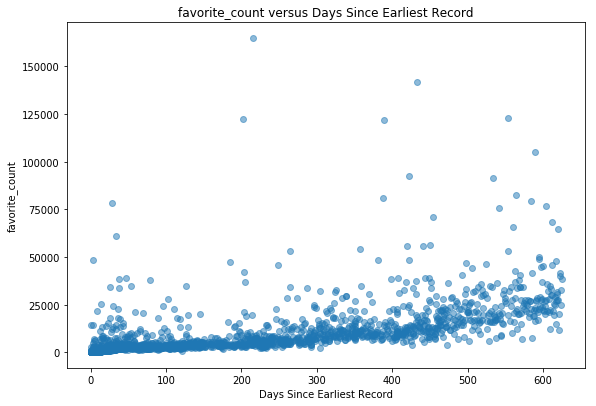

In [954]:
fig = plt.figure()
ax = fig.add_axes([0,0,1.2,1.2])

x = (twitter_archive_clean[twitter_archive_clean.favorite_count.isnull() == False]['timestamp'] - twitter_archive_clean['timestamp'].min())  / np.timedelta64(1,'D')
#https://stackoverflow.com/questions/24588437/convert-date-to-float-for-linear-regression-on-pandas-data-frame/24590666

y = twitter_archive_clean[twitter_archive_clean.favorite_count.isnull() == False].favorite_count

ax.scatter(x, y, alpha = 0.5)
ax.set_title('favorite_count versus Days Since Earliest Record')
ax.set_xlabel('Days Since Earliest Record')
ax.set_ylabel('favorite_count')

plt.show()

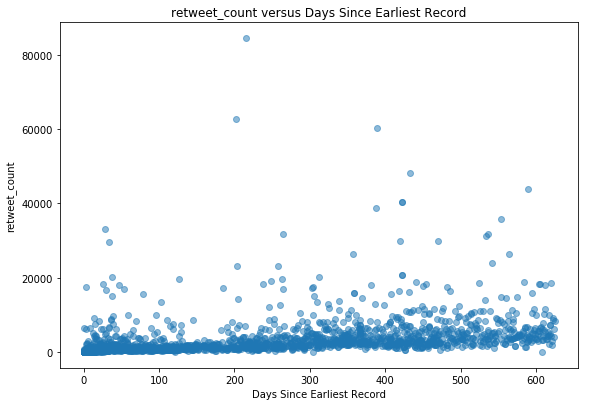

In [955]:
fig = plt.figure()
ax = fig.add_axes([0,0,1.2,1.2])

x = (twitter_archive_clean[twitter_archive_clean.retweet_count.isnull() == False]['timestamp'] - twitter_archive_clean['timestamp'].min())  / np.timedelta64(1,'D')
#https://stackoverflow.com/questions/24588437/convert-date-to-float-for-linear-regression-on-pandas-data-frame/24590666

y = twitter_archive_clean[twitter_archive_clean.retweet_count.isnull() == False].retweet_count

ax.scatter(x, y, alpha = 0.5)
ax.set_title('retweet_count versus Days Since Earliest Record')
ax.set_xlabel('Days Since Earliest Record')
ax.set_ylabel('retweet_count')

plt.show()

## Insights

Which breeds of dogs are mostly tweeted by WeRateDogs?

In [956]:
twitter_archive_clean.p1.value_counts().head(10)

golden_retriever      150
labrador_retriever    100
pembroke               89
chihuahua              83
pug                    56
chow                   44
samoyed                43
toy_poodle             39
pomeranian             38
malamute               30
Name: p1, dtype: int64

Which breeds of dogs receives the most likes?

In [957]:
twitter_archive_clean.favorite_count.groupby(twitter_archive_clean.p1).sum().sort_values(ascending = False).head(10)

p1
golden_retriever      1664533.0
labrador_retriever    1125293.0
pembroke               982394.0
chihuahua              672948.0
samoyed                525808.0
french_bulldog         461896.0
chow                   402244.0
pug                    309689.0
cocker_spaniel         305537.0
pomeranian             299342.0
Name: favorite_count, dtype: float64

In [958]:
twitter_archive_clean.retweet_count.groupby(twitter_archive_clean.p1).sum().sort_values(ascending = False).head(10)

p1
golden_retriever      561143.0
labrador_retriever    416121.0
pembroke              270185.0
chihuahua             237333.0
samoyed               202188.0
chow                  127114.0
cocker_spaniel        117363.0
french_bulldog        116572.0
pug                   107461.0
pomeranian            104071.0
Name: retweet_count, dtype: float64